<a href="https://colab.research.google.com/github/ahtshamulhaq003/university/blob/main/hybridfilter_computervision_Assignment(25%2C15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ahtsham Ul Haq 2021-SE-25
Abdul Haq  2021-SE-15

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

In [2]:
print("Upload image of the first group member (your picture):")
uploaded_A = files.upload()

print("Upload image of the second group member (friend's picture):")
uploaded_B = files.upload()

Upload image of the first group member (your picture):


Saving WhatsApp Image 2024-12-07 at 10.28.59_98fb2681.jpg to WhatsApp Image 2024-12-07 at 10.28.59_98fb2681.jpg
Upload image of the second group member (friend's picture):


Saving WhatsApp Image 2024-12-07 at 10.29.00_c794153a.jpg to WhatsApp Image 2024-12-07 at 10.29.00_c794153a.jpg


In [3]:
image_A_path = list(uploaded_A.keys())[0]
image_B_path = list(uploaded_B.keys())[0]

In [4]:
image_A = cv2.imread(image_A_path)
image_B = cv2.imread(image_B_path)

In [5]:
# Step 3: Resize images to the same size
height, width = 500, 500
image_A_resized = cv2.resize(image_A, (width, height))
image_B_resized = cv2.resize(image_B, (width, height))

image_A_gray = cv2.cvtColor(image_A_resized, cv2.COLOR_BGR2GRAY)
image_B_gray = cv2.cvtColor(image_B_resized, cv2.COLOR_BGR2GRAY)


In [6]:
low_pass = cv2.GaussianBlur(image_A_gray, (25, 25), sigmaX=15)
blurred_image_B = cv2.GaussianBlur(image_B_gray, (25, 25), sigmaX=15)
high_pass = cv2.subtract(image_B_gray, blurred_image_B)

# Step 7: Combine low-pass and high-pass filters for the hybrid image
alpha = 0.6
beta = 0.4
hybrid_gray = cv2.addWeighted(low_pass, alpha, high_pass, beta, 0)



In [7]:
hybrid_color = cv2.addWeighted(image_A_resized, alpha, image_B_resized, beta, 0)

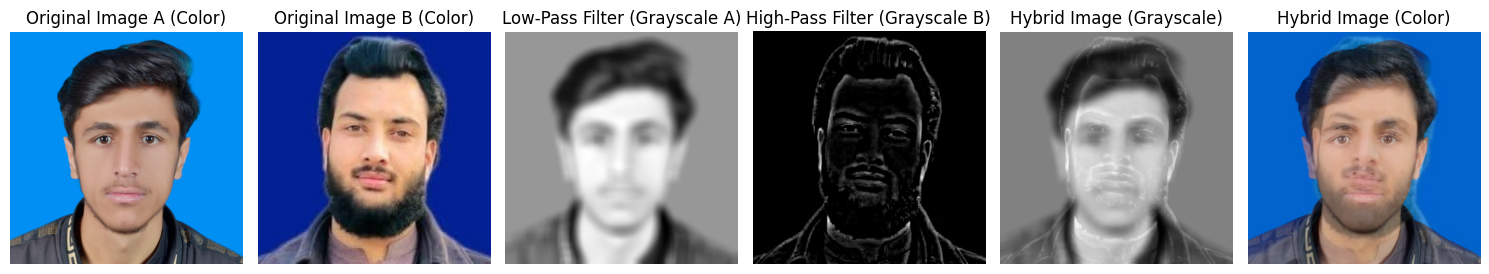

In [8]:

plt.figure(figsize=(15, 5))
titles = ['Original Image A (Color)', 'Original Image B (Color)',
          'Low-Pass Filter (Grayscale A)', 'High-Pass Filter (Grayscale B)',
          'Hybrid Image (Grayscale)', 'Hybrid Image (Color)']
images = [image_A_resized, image_B_resized, low_pass, high_pass, hybrid_gray, hybrid_color]

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, len(images), i+1)
    cmap = 'gray' if len(img.shape) == 2 else None
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if cmap is None else img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()